# Neural Networks

## 1. Perceptrons as Logic Operators

###  a) AND Operator

In [2]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.0                    0          Yes
       0          1                  -1.0                    0          Yes
       1          0                  -1.0                    0          Yes
       1          1                   0.0                    1          Yes


### b) OR Operator

Two ways to change AND to OR: 

1. Increase `weight`
2. Decrease `bias`

In [4]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.0                    0          Yes
       0          1                   0.0                    1          Yes
       1          0                   0.0                    1          Yes
       1          1                   1.0                    1          Yes


### c) NOT Operator

In [8]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1.0
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                  -1.0                    0          Yes
       1          0                   0.0                    1          Yes
       1          1                  -1.0                    0          Yes


### d) XOR Operator

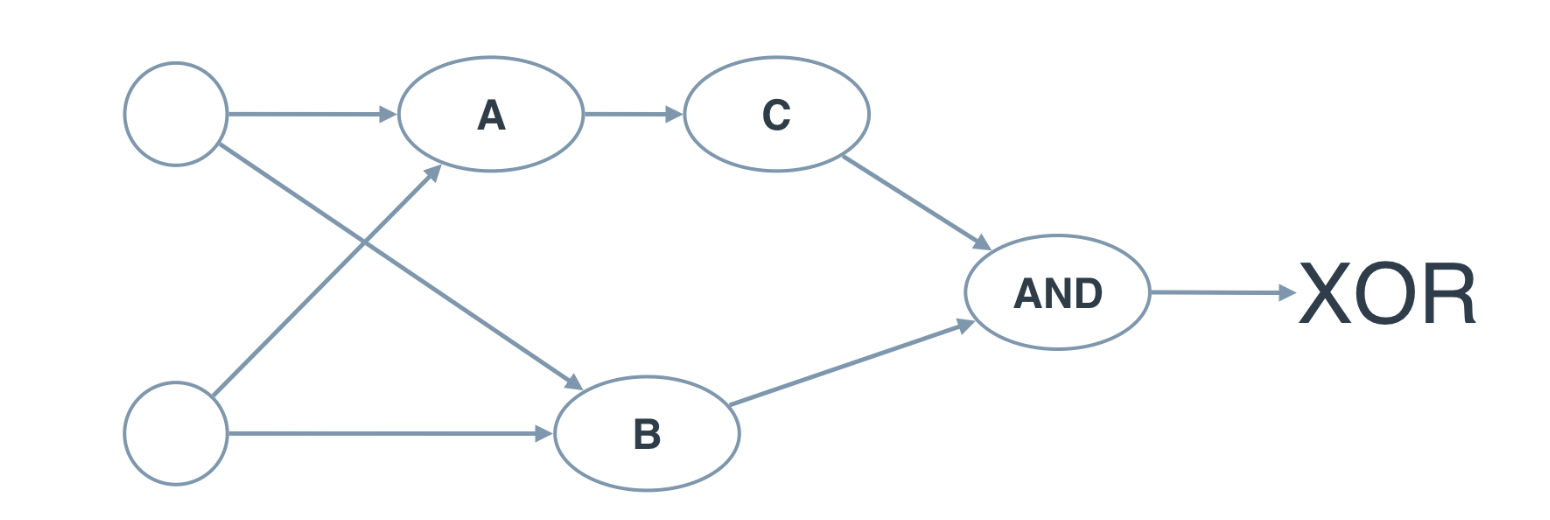 

A: AND
B: OR
C: NOT

## 2. Perceptron Algorithm

Recall that the perceptron step works as follows. For a point with coordinates (p,q)(p,q), label y, and prediction given by the equation y^=step(w1x1+w2x2+b):

If the point is correctly classified, do nothing.

If the point is classified positive, but it has a negative label, subtract αp,αq, and α from w1,w2, and bb respectively.

If the point is classified negative, but it has a positive label, add αp,αq, and α to w1,w2, and bb respectively. 



In [9]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.001, num_epochs = 1000):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


## 3. Softmax

Linear Function Scores: Z1, Z2, ..., Zn

P(class i) = (e^Zi) / (e^Z1+...+e^Zn)


In [10]:
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

## 4. One-Hot Encoding

In calssification, for multple classes, to aviod dependencies between classes: 

Assign 1 variable for each class

## 5. Maximum Liklihood

Maximize the probabilites for all red points being red and all blue points being blue. 

Multiply all the probabilities.

## 6. Cross-Entropy

**Defination**: Sum of all the -log(P)

**Goal**: Minimize cross-entropy

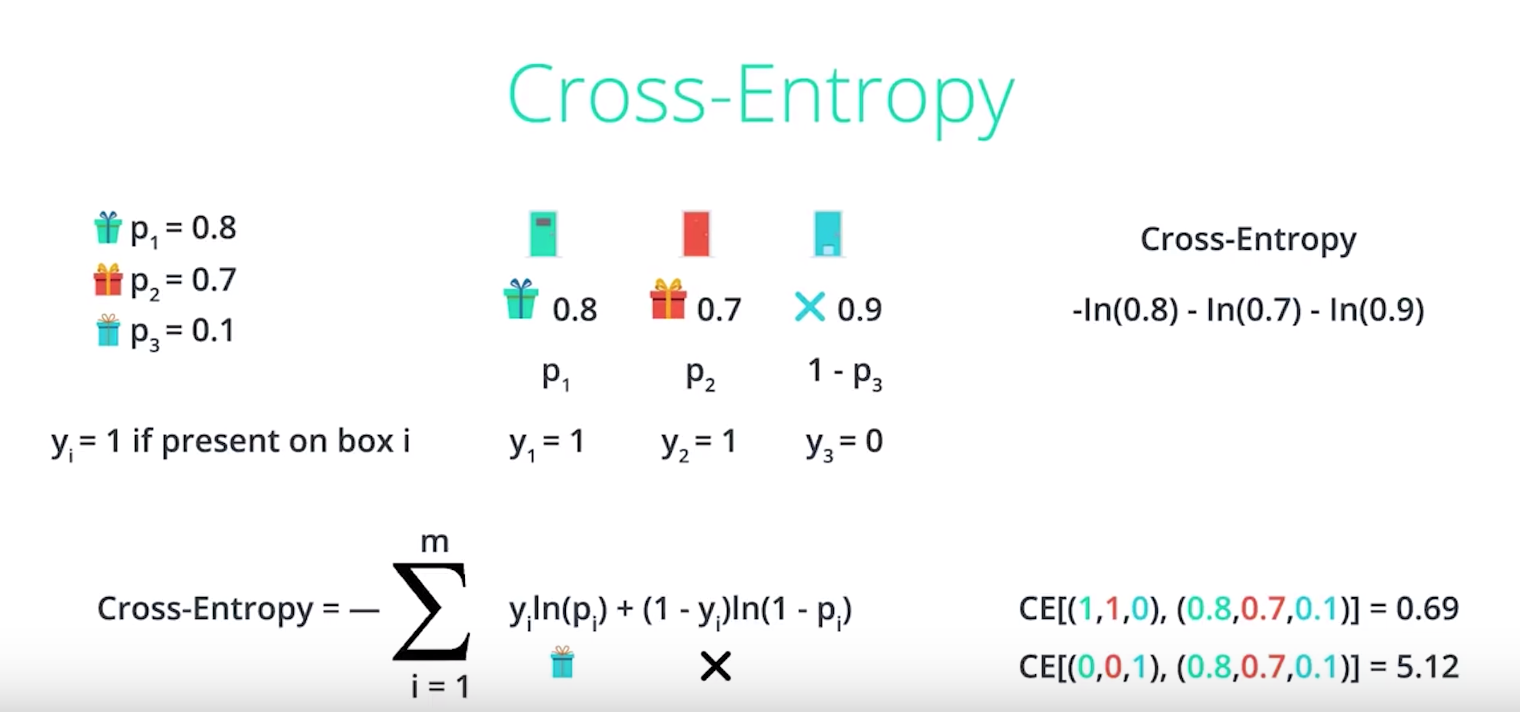

In [12]:
import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

## 7. Logistic Regression

Now, we're finally ready for one of the most popular and useful algorithms in Machine Learning, and the building block of all that constitutes Deep Learning. The Logistic Regression Algorithm. And it basically goes like this:

1. Take your data
2. Pick a random model
3. Calculate the error
4. Minimize the error, and obtain a better model
5. Enjoy! 

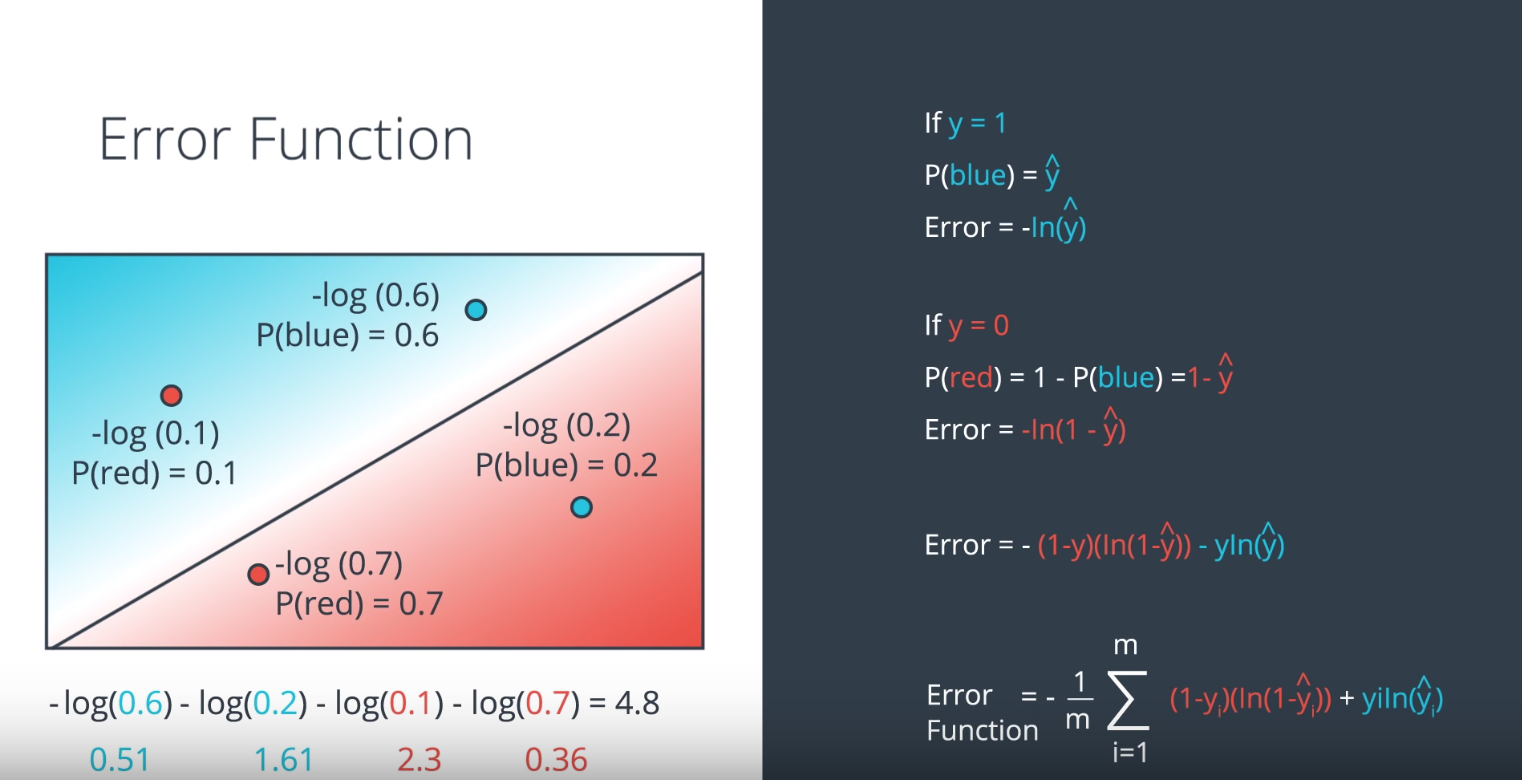

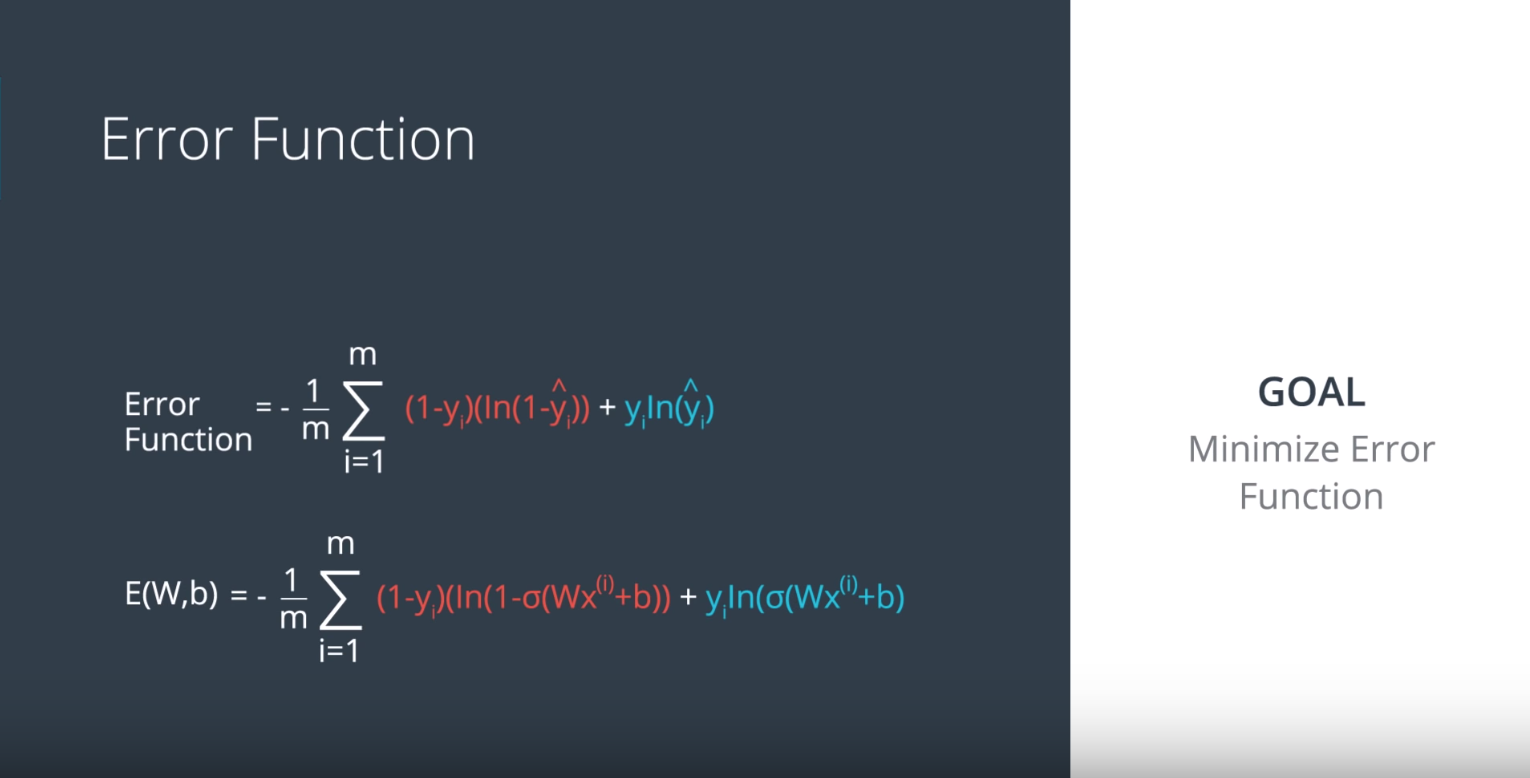

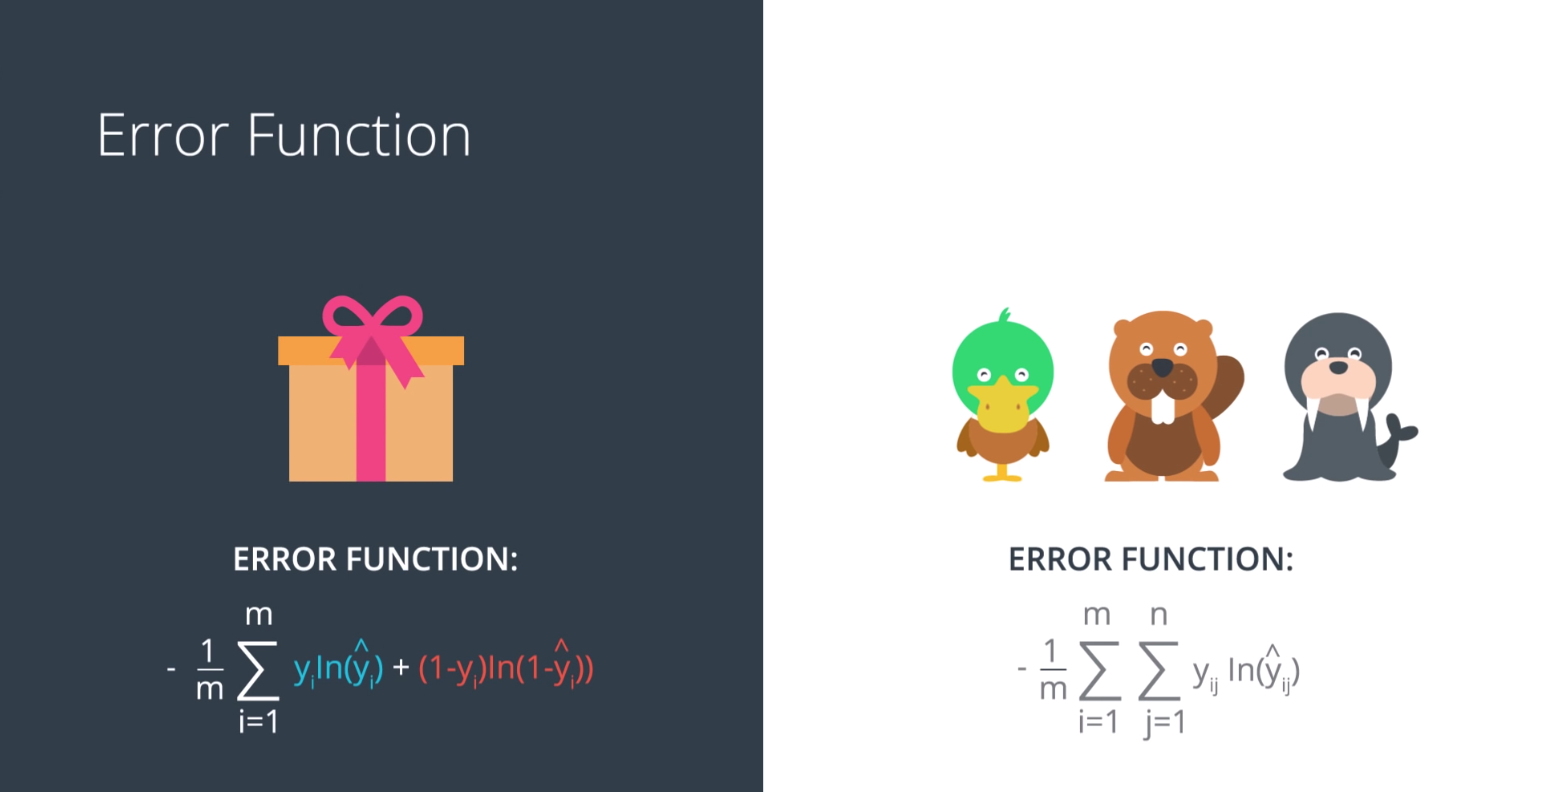


## 8. Gradient Descent

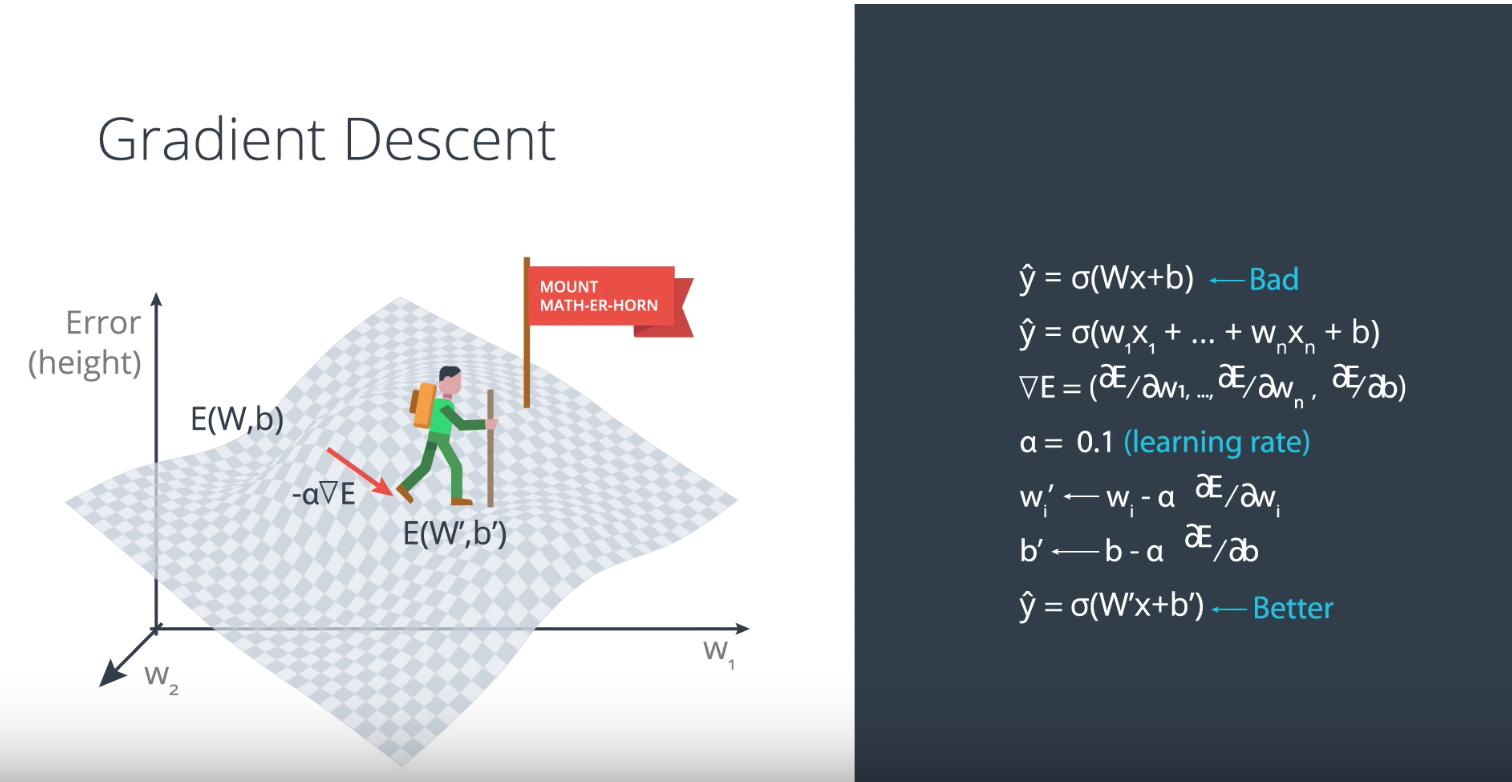

### a) Gradient Calculation

The first thing to notice is that the sigmoid function has a really nice derivative. Namely, 

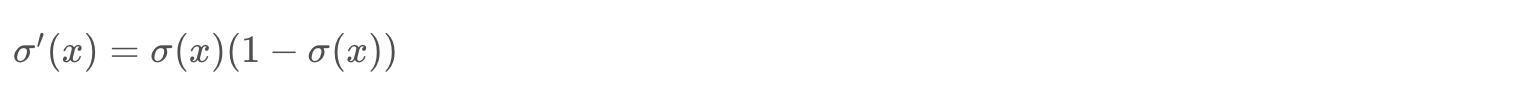

The reason for this is the following, we can calculate it using the quotient formula:

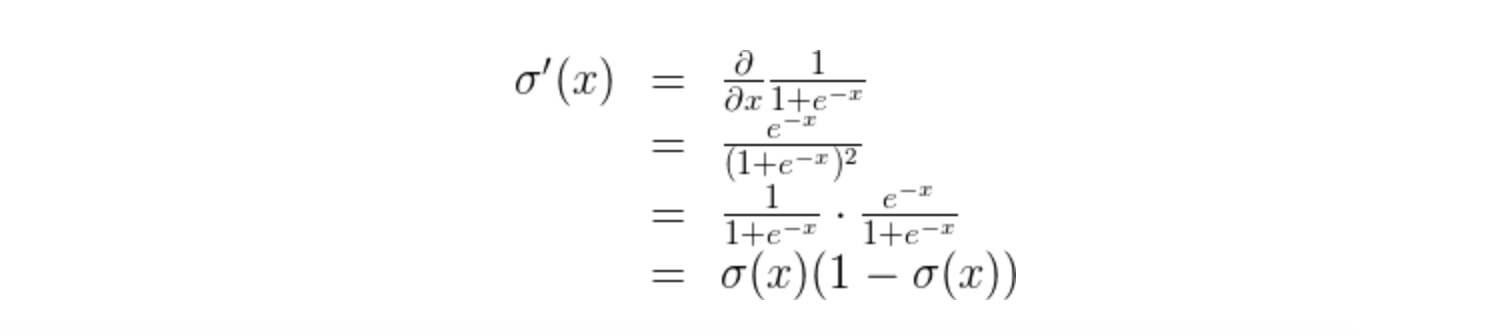

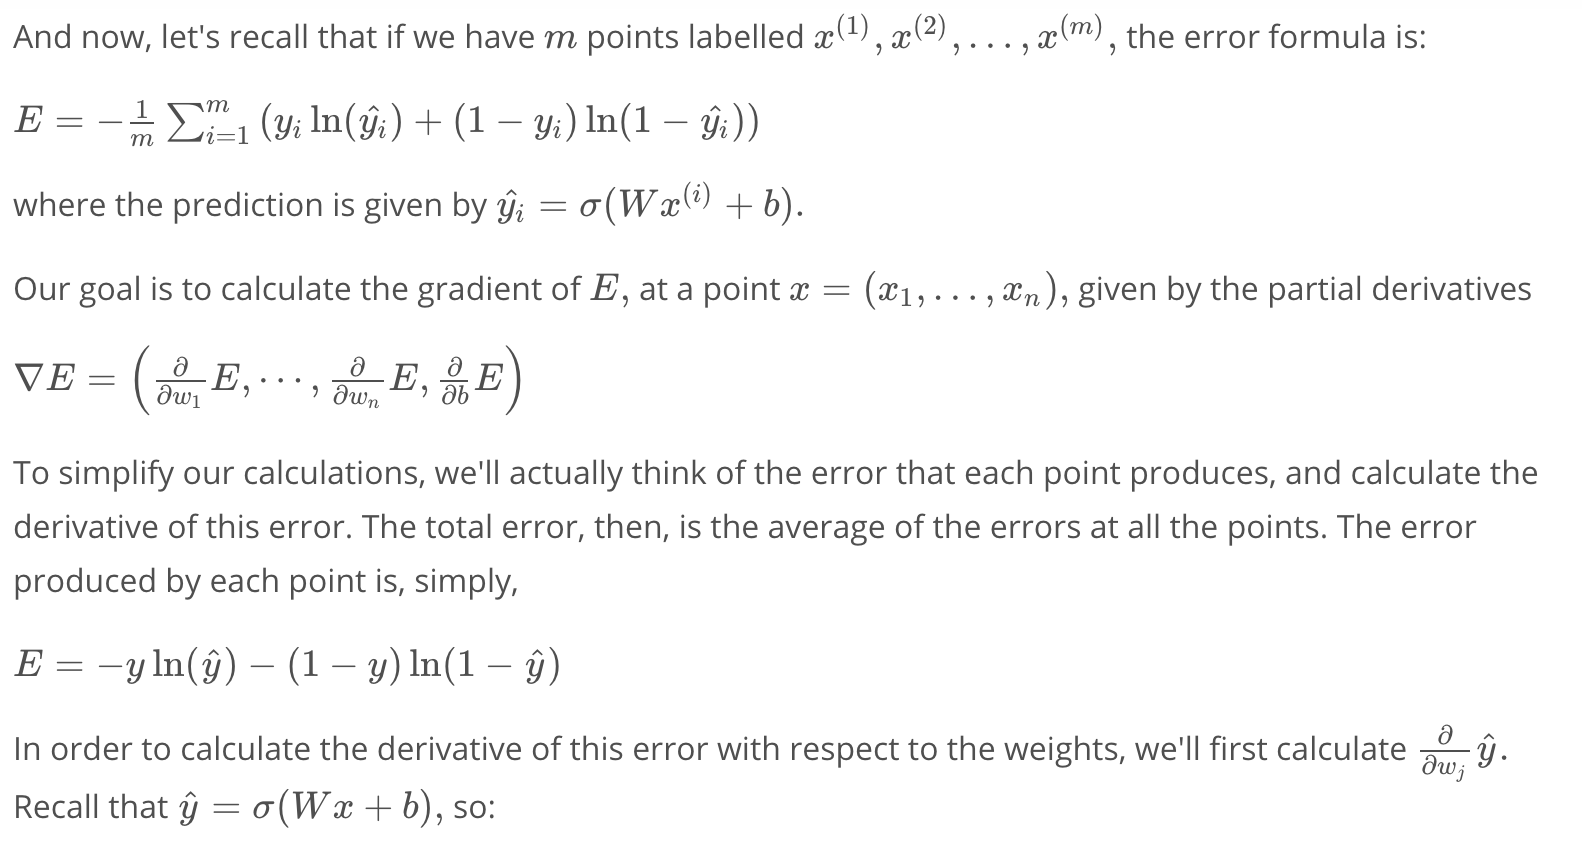

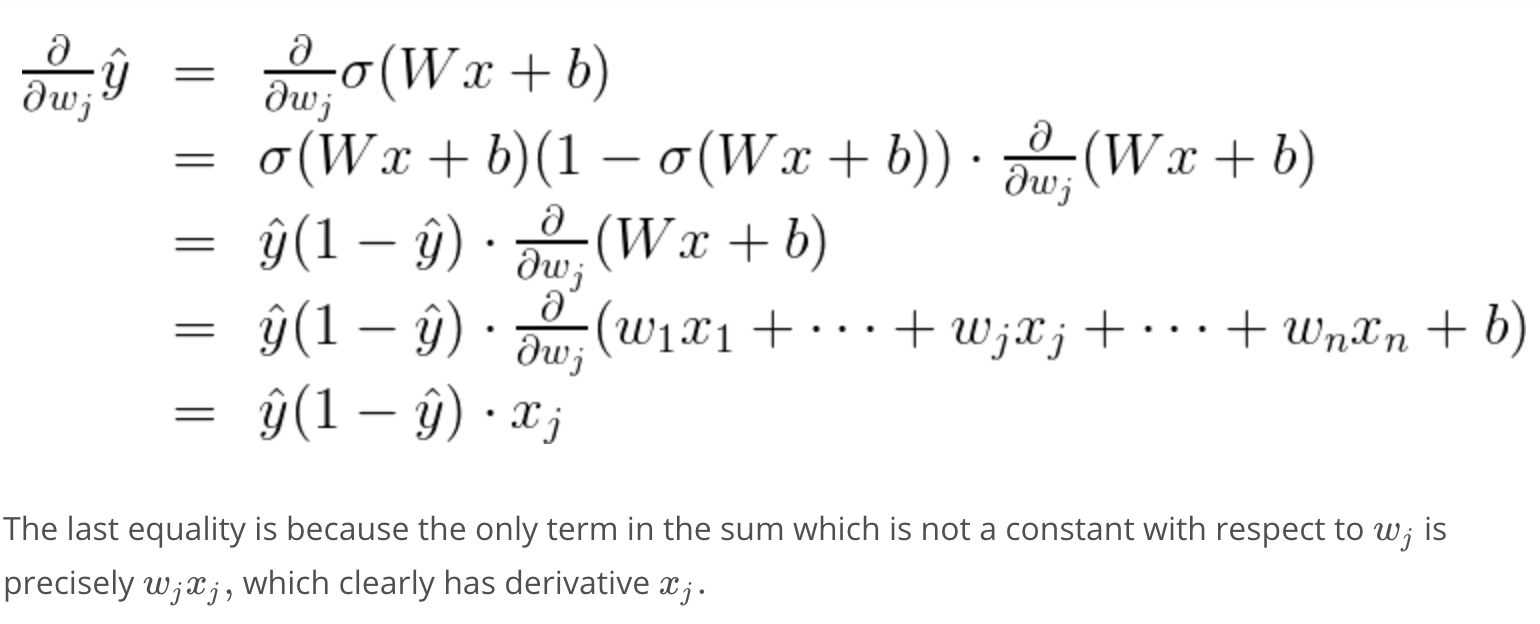

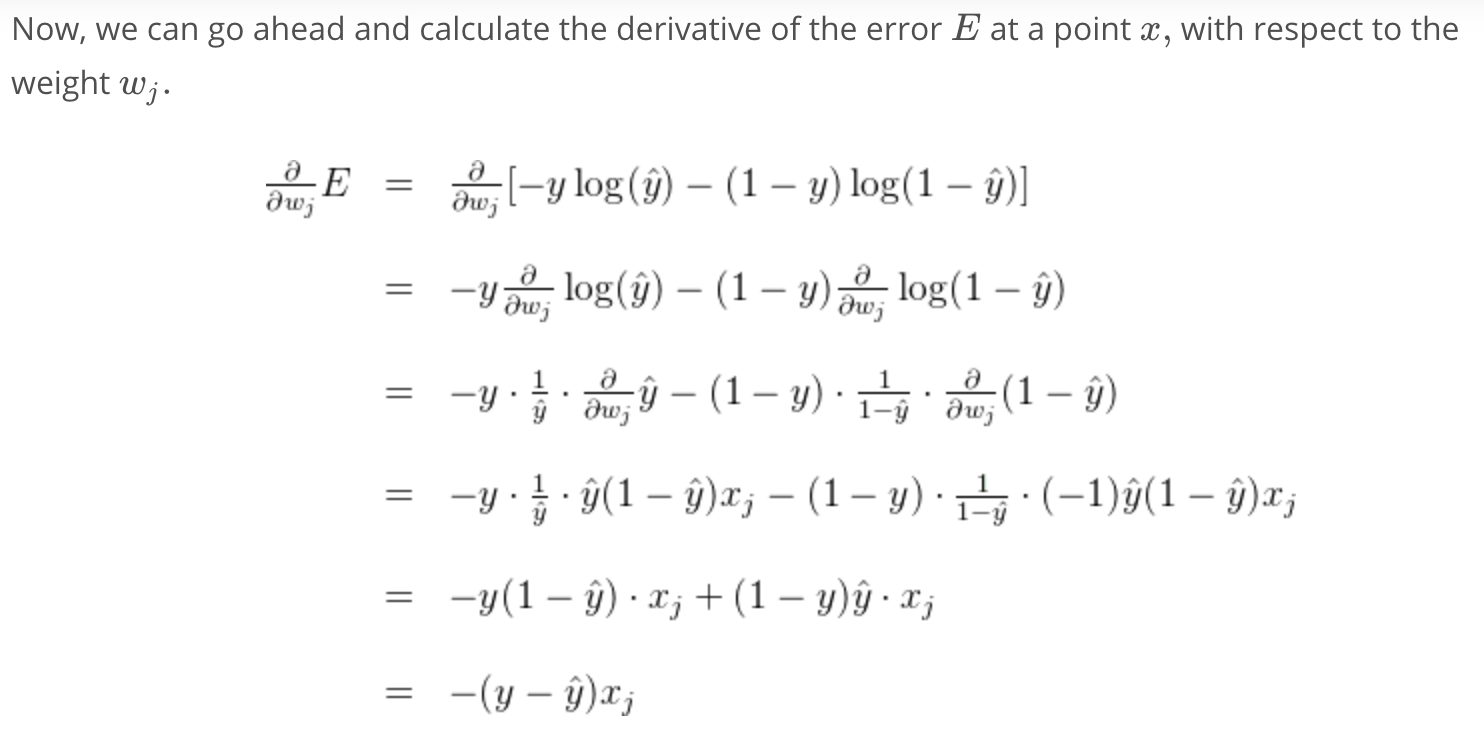

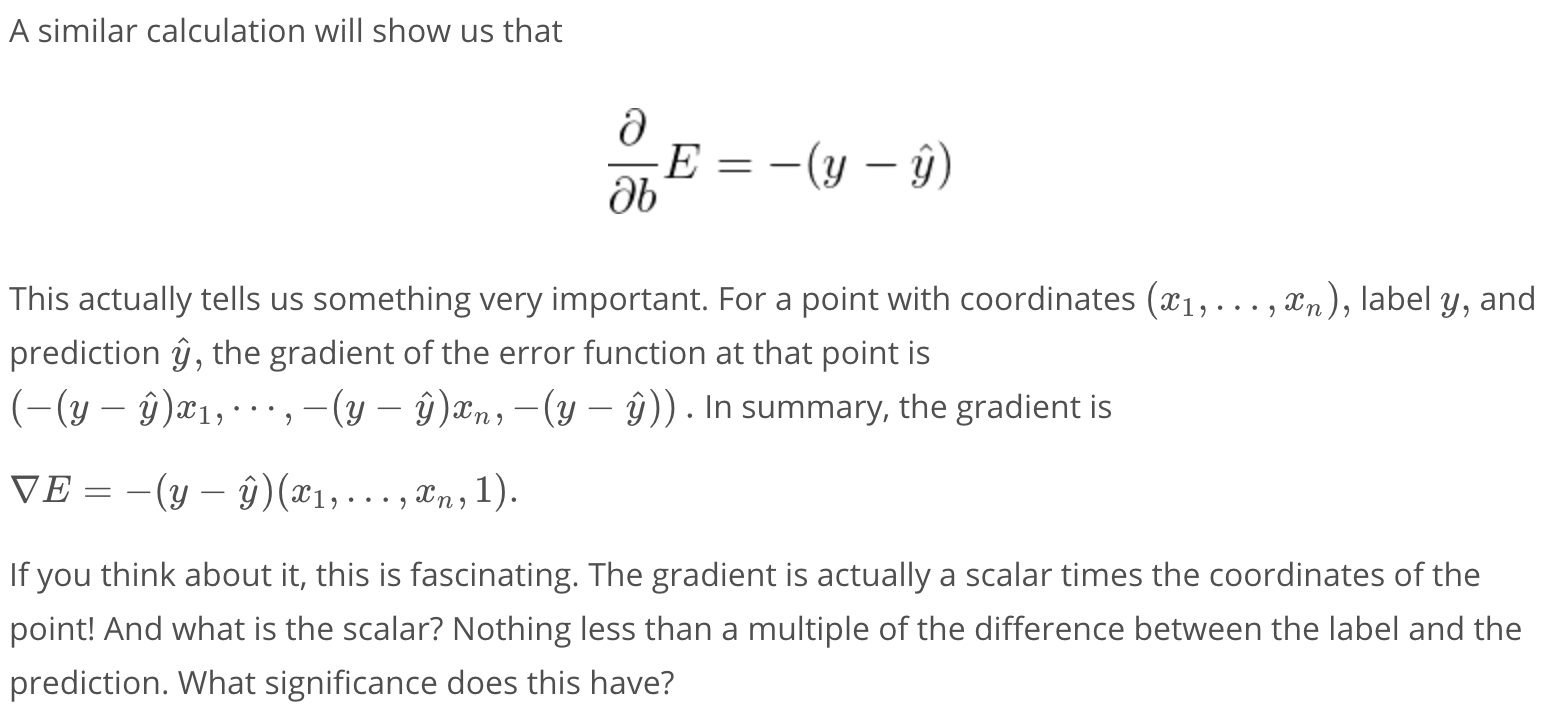

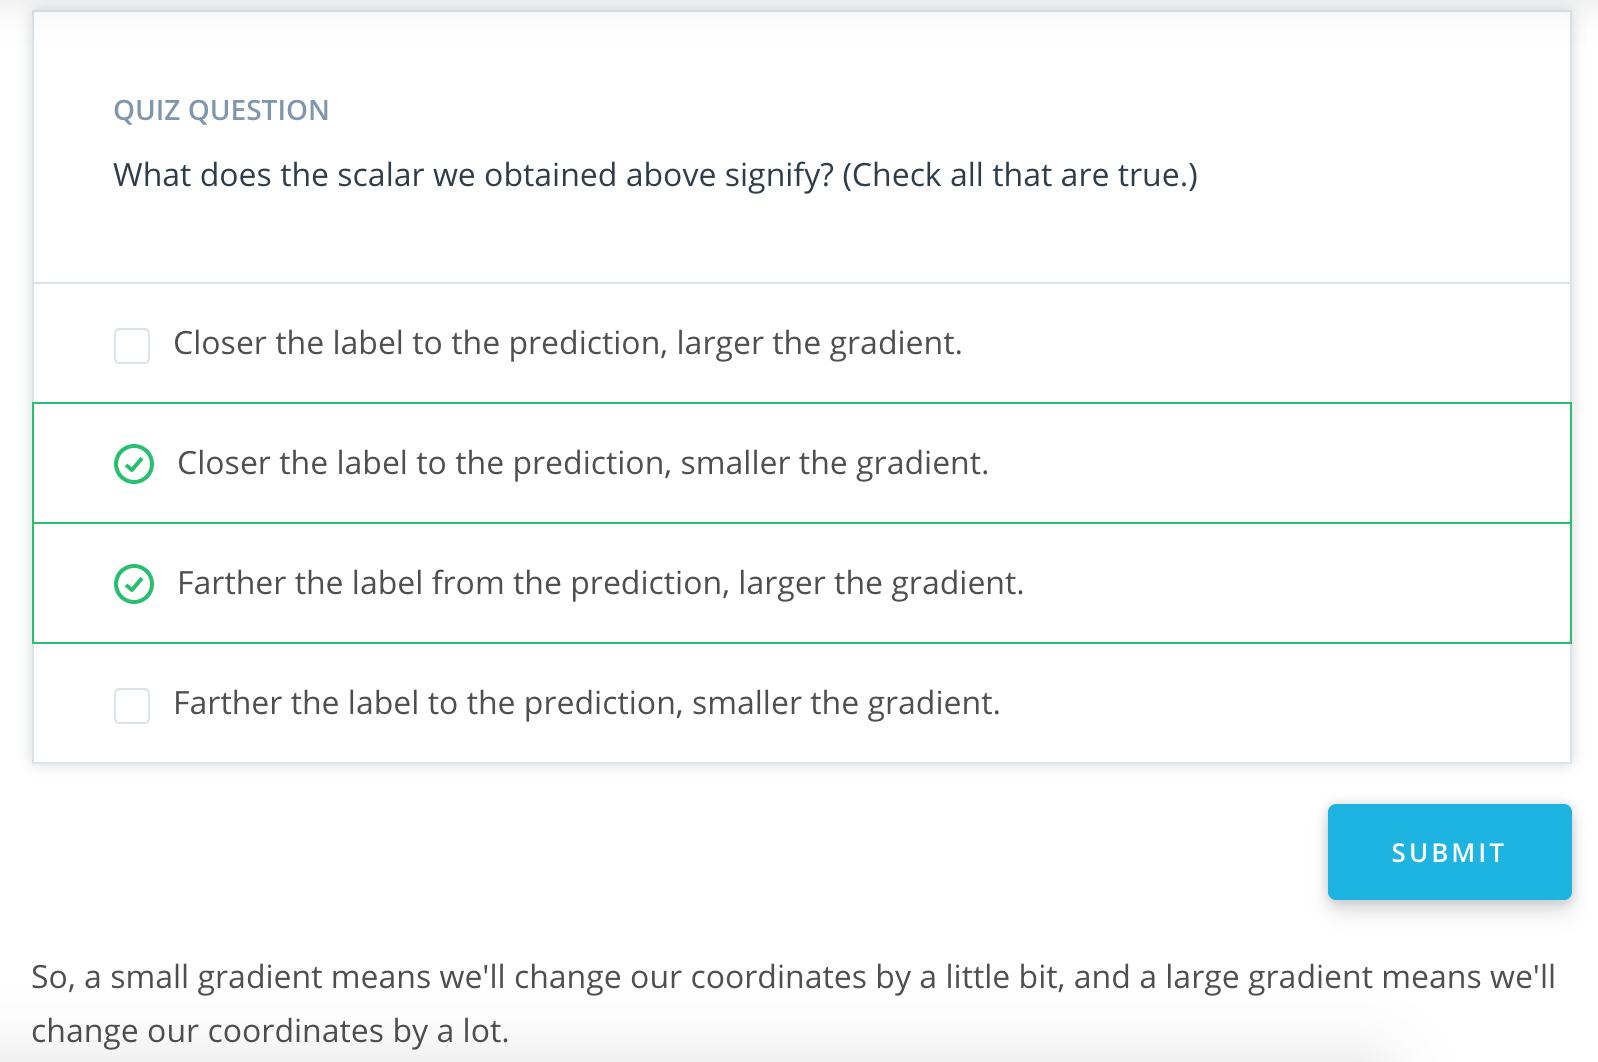

### b) Gradient Descent Step

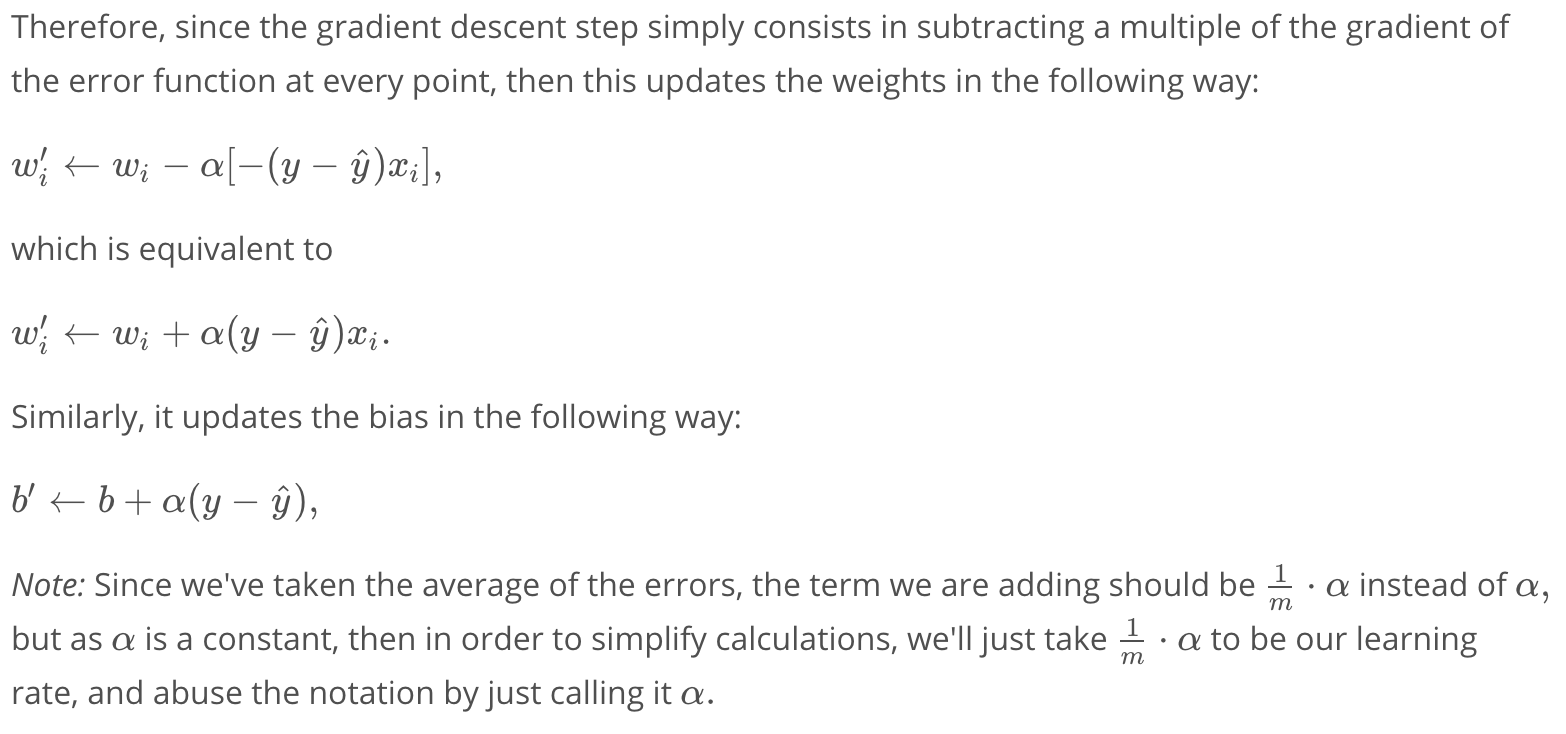

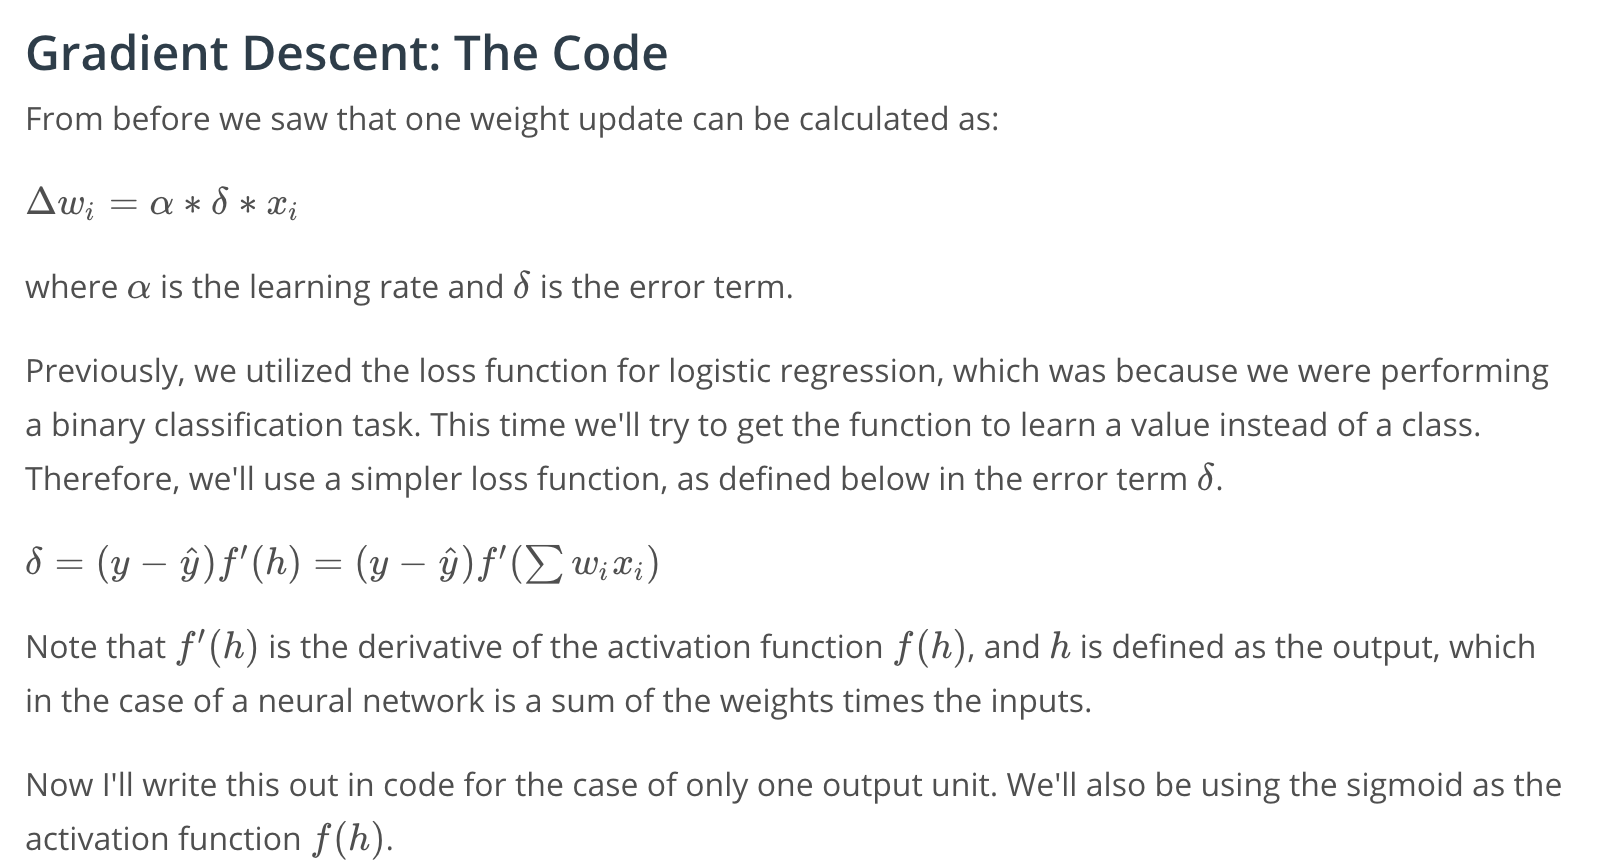

In [ ]:
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])
# Target
y = 0.2
# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# The neural network output (y-hat)
nn_output = sigmoid(x[0]*weights[0] + x[1]*weights[1])
# or nn_output = sigmoid(np.dot(x, weights))

# output error (y - y-hat)
error = y - nn_output

# error term (lowercase delta)
error_term = error * sigmoid_prime(np.dot(x,weights))

# Gradient descent step 
del_w = [ learnrate * error_term * x[0],
                 learnrate * error_term * x[1]]
# or del_w = learnrate * error_term * x

In [13]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

learnrate = 0.5
x = np.array([1, 2])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5])

# Calculate one gradient descent step for each weight
# TODO: Calculate output of neural network
nn_output = sigmoid(np.dot(x, w))

# TODO: Calculate error of neural network
error = y - nn_output

# def sigmoid_prime(x):
#   return sigmoid(x) * (1 - sigmoid(x))
# error_term = error * sigmoid_prime(np.dot(x, w))

# TODO: Calculate change in weights
del_w = learnrate * error * nn_output * (1 - nn_output) * x  # del_w = learnrate * error_term * X



print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.3775406687981454
Amount of Error:
0.1224593312018546
Change in Weights:
[0.0143892 0.0287784]


## 9. Multilayer Perceptrons



In [2]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]
